In [5]:
import pandas as pd 
import mysql.connector
import re
import matplotlib.pyplot as plt
import seaborn as sb
import requests 
from bs4 import BeautifulSoup
from sqlalchemy import create_engine
import pca as pca

#connect to MYSQL
hostname = 'localhost'
database = 'f12018seasondb'
username = '6tain'
password = 'password'

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname,
                                                                        db=database, user=username, pw=password))

In [6]:
year = 2018

champ_pnts_url = f'https://www.racefans.net/{year}-f1-season/{year}-f1-statistics/{year}-f1-championship-points/'
qual_data_url = f'https://www.racefans.net/{year}-f1-season/{year}-f1-statistics/{year}-f1-qualifying-data/'
penalties_url = f'https://www.racefans.net/{year}-f1-season/{year}-f1-statistics/{year}-f1-retirements-penalties/'
race_data_url = f'https://www.racefans.net/{year}-f1-season/{year}-f1-statistics/{year}-f1-race-data/'
pitstops_url = f'https://www.racefans.net/{year}-f1-season/{year}-f1-statistics/{year}-f1-strategy-pit-stops/'

def Extract_table(table, df_name_str):
    df_name_str = f"{df_name_str}_{year}"
    columns = table.find_all('th')
    if len(columns) == 0:
        thead = table.find('thead')
        if thead:
            columns = thead.find_all('td')
        else:
            columns = table.find_all('tr')[0].find_all('td')
    Columns = [i.text.strip() for i in columns]
    df = pd.DataFrame(columns = Columns)
    rows_data = table.find_all('tr')  # skip the header row
    for row in rows_data:
        row_dt = row.find_all('td')[:len(Columns)]
        if len(row_dt) != len(Columns):
            print(f"Error: Row has incorrect number of columns for year {year}")
            continue
        ind_row_data = [i.text.strip() for i in row_dt]
        df.loc[len(df)] = ind_row_data 
        df.to_csv(f"C:/Users/user/Desktop/Houdini/Datasets/F1_data2015-2021/{df_name_str}.csv", index=False)     
    return df
        
  
# Championship data
page = requests.get(champ_pnts_url)
soup = BeautifulSoup(page.text, 'html')
tables = soup.find_all('table')
driver = tables[0]
team = tables[1]
    
driver  = Extract_table(driver, 'driver_df') # Driver data
team = Extract_table(team, "team_df")     # Team data

# Qualifying data

page = requests.get(qual_data_url)
soup = BeautifulSoup(page.text, 'html')
tables = soup.find_all('table')
Qualifying = soup.find_all('table')[0]
start_pos = soup.find_all('table')[1]
teammate_comp = soup.find_all('table')[2]
Qualis = soup.find_all('table')[3]

Qualifying = Extract_table(Qualifying, 'Qualifying_df')
start_pos = Extract_table(start_pos, 'start_pos_df')
teammate_comp = Extract_table(teammate_comp, 'teammate_comp_df')
Qualis = Extract_table(Qualis, 'Qualis_df')

# Penalties
page = requests.get(penalties_url)
soup = BeautifulSoup(page.text, 'html')
tables = soup.find_all('table')
retirements = soup.find_all('table')[0]
penalties = soup.find_all('table')[1]

retirements = Extract_table(retirements, 'retirements_df')
Penalties = Extract_table(penalties, 'penalties_df')

# Race data
page = requests.get(race_data_url)
soup = BeautifulSoup(page.text, 'html')
tables = soup.find_all('table')
laps_per_pos = soup.find_all('table')[0]
start_and_fin = soup.find_all('table')[1]
laps_led = soup.find_all('table')[2]
pos_change_lap_one = soup.find_all('table')[3]

laps_per_pos = Extract_table(laps_per_pos, 'laps_per_pos_df')
start_and_fin = Extract_table(start_and_fin, 'start_and_fin_df')
laps_led = Extract_table(laps_led, 'laps_led_df')
pos_change_lap_one = Extract_table(pos_change_lap_one, 'pos_change_lap_one_df')

# Pitstop data
page = requests.get(pitstops_url)
soup = BeautifulSoup(page.text, 'html')
tables = soup.find_all('table')
pit_stops = soup.find_all('table')[0]
Fastest_pitstops = soup.find_all('table')[1]
Tyres = soup.find_all('table')[2]

pit_stops = Extract_table(pit_stops, 'pit_stops_df')
Fastest_pitstops = Extract_table(Fastest_pitstops, 'Fastest_pitstops_df')
Tyres = Extract_table(Tyres, 'Tyres_df')

Error: Row has incorrect number of columns for year 2018
Error: Row has incorrect number of columns for year 2018
Error: Row has incorrect number of columns for year 2018
Error: Row has incorrect number of columns for year 2018
Error: Row has incorrect number of columns for year 2018
Error: Row has incorrect number of columns for year 2018


In [7]:
driver = driver.iloc[:, 1:]
driver

,Driver,Total,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,Lewis Hamilton,408,18,15,12,25,25,15,10,25,...,25,18,25,25,25,25,15,12,25,25
1,Sebastian Vettel,320,25,25,4,12,12,18,25,10,...,18,25,12,15,15,8,12,18,8,18
2,Kimi Raikkonen,251,15,0,15,18,0,12,8,15,...,15,0,18,10,12,10,25,15,15,0
3,Max Verstappen,249,8,0,10,0,15,2,15,18,...,0,15,10,18,10,15,18,25,18,15
4,Valtteri Bottas,247,4,18,18,0,18,10,18,6,...,10,12,15,12,18,18,10,10,10,10
5,Daniel Ricciardo,170,12,0,25,0,10,25,12,12,...,12,0,0,8,8,12,0,0,12,12
6,Nico Hulkenberg,69,6,8,8,0,0,4,6,2,...,0,0,0,1,0,0,8,8,0,0
7,Sergio Perez,62,0,0,0,15,2,0,0,0,...,0,10,6,0,1,6,4,0,1,4
8,Kevin Magnussen,56,0,10,1,0,8,0,0,8,...,6,4,0,0,4,0,0,0,2,1
9,Carlos Sainz Jnr,53,1,0,2,10,6,1,4,4,...,2,0,4,4,0,1,6,0,0,8


In [8]:
team = team.iloc[:, 1:]
team

,Team,Total,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,Mercedes,655,22,33,30,25,43,25,28,31,...,35,30,40,37,43,43,25,22,35,35
1,Ferrari,571,40,25,19,30,12,30,33,25,...,33,25,30,25,27,18,37,33,23,18
2,Red Bull,419,20,0,35,0,25,27,27,30,...,12,15,10,26,18,27,18,25,30,27
3,Renault,122,7,8,10,10,6,5,10,6,...,2,0,4,5,0,1,14,8,0,8
4,Force India,111,0,1,0,15,2,8,2,0,...,0,18,14,0,3,8,4,0,1,4
5,Haas,93,0,10,1,0,8,0,0,8,...,7,10,0,0,4,4,0,0,6,3
6,McLaren,62,12,10,6,8,4,0,0,0,...,4,0,0,6,0,0,0,4,0,0
7,Sauber,48,0,2,0,8,1,0,1,1,...,0,1,0,2,6,0,1,8,6,6
8,Toro Rosso,33,0,12,0,1,0,6,0,0,...,8,2,0,0,0,0,2,1,0,0
9,Williams,7,0,0,0,4,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0


In [9]:
Qualifying.columns.values[[0, 2]] = ['Driver', 'AUST']
Qualifying

,Driver,Average,AUST,BAH,CHI,AZE,SPA,MON,CAN,FRE,...,HUN,BEL,ITA,SIN,RUS,JAP,UNI,MEX,BRA,ABU
0,Lewis Hamilton,2.48,1,4,4,2,1,3,4,1,...,1,1,3,1,2,1,1,3,1,1
1,Sebastian Vettel,2.62,3,1,1,1,3,2,1,3,...,4,2,2,3,3,9,2,4,2,3
2,Valtteri Bottas,3.52,10,3,3,3,2,5,2,2,...,2,10,4,4,1,2,4,5,3,2
3,Kimi Raikkonen,3.86,2,2,2,6,4,4,5,6,...,3,6,1,5,4,4,3,6,4,4
4,Max Verstappen,6.76,4,15,5,5,5,20,3,4,...,7,7,5,2,15,3,15,2,5,6
5,Daniel Ricciardo,7.33,5,5,6,4,6,1,6,5,...,12,8,15,6,15,15,5,1,6,5
6,Esteban Ocon,9.95,15,9,12,7,13,6,8,11,...,18,3,8,9,6,8,6,11,13,9
7,Romain Grosjean,10.05,7,16,10,20,10,15,20,10,...,10,5,6,8,9,5,8,16,9,7
8,Carlos Sainz Jnr,10.38,9,10,9,10,9,8,9,7,...,5,16,7,12,15,13,11,8,16,11
9,Kevin Magnussen,10.52,6,7,11,15,7,19,11,9,...,9,9,11,16,5,12,12,18,11,13


In [10]:
start_pos.columns.values[[0, 2]] = ['Driver', 'AUST']
start_pos

,Driver,Average,AUST,BAH,CHI,AZE,SPA,MON,CAN,FRE,...,HUN,BEL,ITA,SIN,RUS,JAP,UNI,MEX,BRA,ABU
0,Lewis Hamilton,2.71,1,9,4,2,1,3,4,1,...,1,1,3,1,2,1,1,3,1,1
1,Sebastian Vettel,2.86,3,1,1,1,3,2,1,3,...,4,2,2,3,3,8,5,4,2,3
2,Kimi Raikkonen,3.76,2,2,2,6,4,4,5,6,...,3,6,1,5,4,4,2,6,4,4
3,Valtteri Bottas,4.05,15,3,3,3,2,5,2,2,...,2,17,4,4,1,2,3,5,3,2
4,Max Verstappen,7.05,4,15,5,5,5,20,3,4,...,7,7,5,2,19,3,18,2,5,6
5,Daniel Ricciardo,8.14,8,4,6,4,6,1,6,5,...,12,8,19,6,18,15,4,1,11,5
6,Esteban Ocon,10.14,14,8,12,7,13,6,8,11,...,17,3,8,9,6,11,6,11,18,9
7,Romain Grosjean,10.14,6,16,10,20,10,18,20,10,...,10,5,6,8,9,5,8,18,8,7
8,Carlos Sainz Jnr,10.24,9,10,9,9,9,8,9,7,...,5,19,7,12,11,13,11,8,15,11
9,Kevin Magnussen,10.29,5,6,11,15,7,19,11,9,...,9,9,11,16,5,12,12,16,10,13


In [11]:
teammate_comp

,Driver,Beat team mate,Average gap to team mate
0,Fernando Alonso,21,-0.383s
1,Charles Leclerc,17,-0.605s
2,Sebastian Vettel,17,-0.256s
3,Esteban Ocon,16,-0.448s
4,Lewis Hamilton,15,-0.172s
5,Max Verstappen,14,-0.433s
6,Nico Hulkenberg,13,+0.186s
7,Sergey Sirotkin,12,-0.066s
8,Pierre Gasly,11,-0.822s
9,Romain Grosjean,11,-0.258s


In [12]:
Qualis

,Driver,Eliminated in Q1,Eliminated in Q2,Reached Q3
0,Lewis Hamilton,0,1,20
1,Valtteri Bottas,0,0,21
2,Daniel Ricciardo,0,5,16
3,Max Verstappen,1,3,17
4,Sebastian Vettel,0,0,21
5,Kimi Raikkonen,0,0,21
6,Sergio Perez,3,8,10
7,Esteban Ocon,2,7,12
8,Sergey Sirotkin,16,5,0
9,Lance Stroll,15,5,1


In [13]:
retirements

,Driver,Accident,Technical failure,NC,DQ,DNQ,DNS,W
0,Lewis Hamilton,0,1,0,0,0,0,0
1,Valtteri Bottas,0,1,0,0,0,0,0
2,Daniel Ricciardo,1,7,0,0,0,0,0
3,Max Verstappen,1,2,0,0,0,0,0
4,Sebastian Vettel,1,0,0,0,0,0,0
5,Kimi Raikkonen,0,4,0,0,0,0,0
6,Sergio Perez,0,2,0,0,0,0,0
7,Esteban Ocon,3,2,0,1,0,0,0
8,Sergey Sirotkin,1,2,0,0,0,0,0
9,Lance Stroll,1,1,0,0,0,0,0


In [14]:
Penalties

,Driver,Penalties due to driver,Penalties due to team,No action
0,Brendon Hartley,4,8,0
1,Max Verstappen,7,4,2
2,Pierre Gasly,5,6,1
3,Daniel Ricciardo,2,6,1
4,Fernando Alonso,6,2,1
5,Romain Grosjean,4,3,3
6,Esteban Ocon,4,2,2
7,Nico Hulkenberg,1,5,1
8,Carlos Sainz Jnr,4,2,2
9,Marcus Ericsson,2,4,0


In [15]:
laps_per_pos.columns.values[0] = 'Driver'
laps_per_pos

,Driver,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Lewis Hamilton,458,270,218,117,132,37,3,2,6,...,2,1,2,1,1,0,1,0,0,0
1,Valtteri Bottas,84,410,167,172,182,45,16,44,18,...,6,7,16,9,4,4,0,5,0,0
2,Daniel Ricciardo,116,45,91,219,223,208,19,9,5,...,6,19,10,9,5,25,11,2,2,0
3,Max Verstappen,169,168,343,174,122,38,4,13,41,...,10,5,5,7,0,0,2,4,2,0
4,Sebastian Vettel,345,244,198,142,143,67,31,15,7,...,12,5,5,1,8,3,6,5,2,0
5,Kimi Raikkonen,92,127,225,330,158,143,12,2,7,...,5,3,1,2,3,2,1,0,0,0
6,Sergio Perez,0,0,12,26,18,48,109,109,132,...,98,100,60,125,91,32,36,21,22,1
7,Esteban Ocon,0,0,0,6,39,84,122,122,130,...,98,104,65,110,38,21,14,11,5,4
8,Sergey Sirotkin,0,0,0,0,0,0,0,0,16,...,50,49,39,97,174,200,209,180,80,2
9,Lance Stroll,0,0,0,0,0,0,4,38,22,...,62,73,97,141,139,167,188,81,64,44


In [16]:
start_and_fin

,Driver,Started,Classified,Completed
0,Lewis Hamilton,21,20,19
1,Valtteri Bottas,21,20,17
2,Daniel Ricciardo,21,13,12
3,Max Verstappen,21,18,16
4,Sebastian Vettel,21,20,19
5,Kimi Raikkonen,21,17,16
6,Sergio Perez,21,19,11
7,Esteban Ocon,21,15,9
8,Sergey Sirotkin,21,18,2
9,Lance Stroll,21,19,4


In [17]:
laps_led

,Driver,Full season laps led,Driver's season laps led
0,Lewis Hamilton,458/1264 (36.23%),458/1255 (36.49%)
1,Valtteri Bottas,84/1264 (6.65%),84/1202 (6.99%)
2,Daniel Ricciardo,116/1264 (9.18%),116/1034 (11.22%)
3,Max Verstappen,169/1264 (13.37%),169/1127 (15%)
4,Sebastian Vettel,345/1264 (27.29%),345/1248 (27.64%)
5,Kimi Raikkonen,92/1264 (7.28%),92/1116 (8.24%)
6,Sergio Perez,0/1264 (0%),0/1196 (0%)
7,Esteban Ocon,0/1264 (0%),0/1052 (0%)
8,Sergey Sirotkin,0/1264 (0%),0/1118 (0%)
9,Lance Stroll,0/1264 (0%),0/1156 (0%)


In [18]:
pos_change_lap_one

,Driver,Average,Total
0,Lance Stroll,+1.89,+36
1,Max Verstappen,+1.65,+33
2,Carlos Sainz Jnr,+1.2,+24
3,Sergey Sirotkin,+1.16,+22
4,Pierre Gasly,+1.17,+21
5,Nico Hulkenberg,+0.94,+17
6,Charles Leclerc,+0.5,+9
7,Esteban Ocon,+0.47,+8
8,Kevin Magnussen,+0.4,+8
9,Brendon Hartley,+0.33,+6


In [19]:
pit_stops

,Driver,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Lewis Hamilton,1,1,1,2,1,1,1,1,2,...,1,1,1,1,1,1,2,2,1,1
1,Valtteri Bottas,1,1,1,1,1,1,1,2,0,...,1,2,1,1,1,1,1,3,2,2
2,Daniel Ricciardo,1,0,2,1,1,1,1,1,2,...,1,1,1,1,1,1,0,1,1,1
3,Max Verstappen,1,1,2,1,1,1,1,1,1,...,0,1,1,1,1,1,1,2,1,1
4,Sebastian Vettel,1,1,1,2,2,1,1,2,1,...,1,1,2,1,1,1,1,2,2,1
5,Kimi Raikkonen,1,1,1,2,0,1,1,1,1,...,2,2,1,1,1,1,1,1,1,0
6,Sergio Perez,1,2,2,2,2,1,2,0,1,...,1,1,1,3,1,1,1,1,1,1
7,Esteban Ocon,1,2,2,0,1,1,1,0,1,...,1,1,1,0,1,1,1,2,2,1
8,Sergey Sirotkin,0,2,2,0,3,3,1,1,2,...,1,1,1,2,1,2,2,1,1,1
9,Lance Stroll,2,2,1,2,1,3,0,1,2,...,1,1,1,1,1,2,3,2,2,1


In [20]:
Fastest_pitstops.columns.values[[0, 1]] = ['Team', 'AUST']
Fastest_pitstops

,Team,AUST,BAH,CHI,AZE,SPA,MON,CAN,FRE,AUS,...,HUN,BEL,ITA,SIN,RUS,JAP,UNI,MEX,BRA,ABU
0,,AUS,BAH,CHI,AZE,SPA,MON,CAN,FRE,AUS,...,HUN,BEL,ITA,SIN,RUS,JAP,UNI,MEX,BRA,ABU
1,Mercedes,21.66,24.3,22.1,20.19,22.09,23.74,23.34,24.31,20.98,...,21.34,22.38,23.73,28.54,29.55,22.61,23.48,22.11,22.64,21.28
2,Red Bull,20.95,30.38,22.6,19.77,21.62,24.11,23.14,24.31,21.21,...,21.36,22.34,24,28.78,29.37,22.86,23.45,22.02,23.3,21.06
3,Ferrari,21.42,24.52,22.91,20.04,22.05,23.96,23.53,24.29,21.55,...,21.83,22.25,23.86,28.72,29.53,22.75,23.71,21.78,22.55,22.63
4,Force India,21.85,24.6,22.33,26.17,22.24,24.66,23.72,,22.53,...,22.26,23.16,24.83,24.34,29.92,23.32,24.53,22.76,23.51,21.98
5,Williams,21.4,24.64,22.66,19.74,21.35,24.85,23.53,26.27,22.18,...,21.29,22.34,25.25,28.77,29.27,23.65,18.61,22.73,23.27,22.19
6,McLaren,22.47,24.58,23.73,20.76,21.72,24.24,23.1,24.4,21.59,...,21.73,22.71,24.09,29.92,29.64,23.16,24.07,22.17,22.62,21.73
7,Toro Rosso,22.21,24.84,23.17,20.78,22.47,24.3,24.11,24.3,22.01,...,21.68,22.95,27.79,28.93,29.42,23.11,23.82,22.06,23.42,22.49
8,Haas,21.98,24.63,22.97,21.73,22.92,24.24,24.01,25.42,22.12,...,21.73,23.25,24.78,29.32,29.9,23.69,23.72,22.39,23.12,21.59
9,Renault,22.63,24.38,23.12,20.97,22.41,24.87,24.42,25.02,23.26,...,21.91,23.86,24.46,30.24,30.02,23.48,24.68,22.66,23.77,21.96


In [21]:
Tyres

,Driver,Hard,Medium,Soft,Super-soft,Ultra-soft,Hyper-soft,Wet,Intermediate
0,Lewis Hamilton,0,218 (17.4%),487 (38.8%),305 (24.3%),218 (17.4%),27 (2.2%),0,0
1,Valtteri Bottas,0,223 (18.6%),364 (30.3%),379 (31.5%),195 (16.2%),41 (3.4%),0,0
2,Daniel Ricciardo,0,116 (11.2%),344 (33.3%),314 (30.4%),199 (19.2%),61 (5.9%),0,0
3,Max Verstappen,0,62 (5.5%),451 (40%),390 (34.6%),141 (12.5%),81 (7.2%),0,2 (0.2%)
4,Sebastian Vettel,0,124 (9.9%),491 (39.3%),266 (21.3%),337 (27%),30 (2.4%),0,0
5,Kimi Raikkonen,0,131 (12.2%),464 (43.1%),166 (15.4%),276 (25.7%),39 (3.6%),0,0
6,Sergio Perez,0,56 (4.8%),540 (46%),363 (30.9%),157 (13.4%),59 (5%),0,0
7,Esteban Ocon,0,89 (8.6%),422 (40.6%),302 (29.1%),164 (15.8%),62 (6%),0,0
8,Sergey Sirotkin,0,241 (22.1%),402 (36.9%),321 (29.4%),105 (9.6%),21 (1.9%),0,0
9,Lance Stroll,0,276 (24.2%),380 (33.3%),256 (22.5%),183 (16.1%),42 (3.7%),0,3 (0.3%)


In [22]:
# load to sql database
dataframes = {'driver':driver, 'team':team, 'qualifying':Qualifying, 
            'start_position':start_pos, 'teammate_comparison':teammate_comp, 
            'qulifying_sessions':Qualis, 'retirements':retirements, 'penalties':Penalties,
            'laps_per_position':laps_per_pos, 'start_and_fin':start_and_fin, 
            'laps_led':laps_led, 'pos_change_lap_one':pos_change_lap_one,
            'pit_stop':pit_stops, 'fastest_pitstops':Fastest_pitstops, 'tyres':Tyres}

for table, df in dataframes.items():
    df.to_sql(table, engine, if_exists='replace', index=True)

In [23]:
Datasets = []
pit_stops[pit_stops.columns[1:]] = pit_stops[pit_stops.columns[1:]].apply(pd.to_numeric)
pit_stops['pitstops_average'] = pit_stops.mean(numeric_only=True, axis=1)
pitstops = pit_stops[['Driver', 'pitstops_average']]
Datasets.append(pitstops)
pitstops

,Driver,pitstops_average
0,Lewis Hamilton,1.190476
1,Valtteri Bottas,1.285714
2,Daniel Ricciardo,1.000000
3,Max Verstappen,1.190476
4,Sebastian Vettel,1.333333
5,Kimi Raikkonen,1.142857
6,Sergio Perez,1.333333
7,Esteban Ocon,1.047619
8,Sergey Sirotkin,1.428571
9,Lance Stroll,1.523810


In [24]:
def extract_percentage(value):
    # if value is 0 return as is
    if value == '0':
        value = str(value)
        return float(0)
    # regex
    match = re.search(r'\(([\d\.]+)%\)', str(value))
    if match:
        return float(match.group(1))
    return None

Tyres.iloc[:, 1:] = Tyres.iloc[:, 1:].map(extract_percentage)
Datasets.append(Tyres)
Tyres

,Driver,Hard,Medium,Soft,Super-soft,Ultra-soft,Hyper-soft,Wet,Intermediate
0,Lewis Hamilton,0.0,17.4,38.8,24.3,17.4,2.2,0.0,0.0
1,Valtteri Bottas,0.0,18.6,30.3,31.5,16.2,3.4,0.0,0.0
2,Daniel Ricciardo,0.0,11.2,33.3,30.4,19.2,5.9,0.0,0.0
3,Max Verstappen,0.0,5.5,40.0,34.6,12.5,7.2,0.0,0.2
4,Sebastian Vettel,0.0,9.9,39.3,21.3,27.0,2.4,0.0,0.0
5,Kimi Raikkonen,0.0,12.2,43.1,15.4,25.7,3.6,0.0,0.0
6,Sergio Perez,0.0,4.8,46.0,30.9,13.4,5.0,0.0,0.0
7,Esteban Ocon,0.0,8.6,40.6,29.1,15.8,6.0,0.0,0.0
8,Sergey Sirotkin,0.0,22.1,36.9,29.4,9.6,1.9,0.0,0.0
9,Lance Stroll,0.0,24.2,33.3,22.5,16.1,3.7,0.0,0.3


In [25]:
qualifying = Qualifying[['Driver', 'Average']]
qualifying.columns.values[1] = 'qualifying_average'
Datasets.append(qualifying)
qualifying

,Driver,qualifying_average
0,Lewis Hamilton,2.48
1,Sebastian Vettel,2.62
2,Valtteri Bottas,3.52
3,Kimi Raikkonen,3.86
4,Max Verstappen,6.76
5,Daniel Ricciardo,7.33
6,Esteban Ocon,9.95
7,Romain Grosjean,10.05
8,Carlos Sainz Jnr,10.38
9,Kevin Magnussen,10.52


In [26]:
lapsperposition = laps_per_pos.iloc[:, 0:4]
lapsperposition.columns.values[1:] = ['first_position', 'second_position', 'third_position']
Datasets.append(lapsperposition)
lapsperposition

,Driver,first_position,second_position,third_position
0,Lewis Hamilton,458,270,218
1,Valtteri Bottas,84,410,167
2,Daniel Ricciardo,116,45,91
3,Max Verstappen,169,168,343
4,Sebastian Vettel,345,244,198
5,Kimi Raikkonen,92,127,225
6,Sergio Perez,0,0,12
7,Esteban Ocon,0,0,0
8,Sergey Sirotkin,0,0,0
9,Lance Stroll,0,0,0


In [27]:
Datasets.append(start_and_fin)
print(len(Datasets))
laps_led.iloc[:, 1:] = laps_led.iloc[:, 1:].map(extract_percentage)
Datasets.append(laps_led)
print(len(Datasets))
laps_led

5
6


,Driver,Full season laps led,Driver's season laps led
0,Lewis Hamilton,36.23,36.49
1,Valtteri Bottas,6.65,6.99
2,Daniel Ricciardo,9.18,11.22
3,Max Verstappen,13.37,15.0
4,Sebastian Vettel,27.29,27.64
5,Kimi Raikkonen,7.28,8.24
6,Sergio Perez,0.0,0.0
7,Esteban Ocon,0.0,0.0
8,Sergey Sirotkin,0.0,0.0
9,Lance Stroll,0.0,0.0


In [28]:
accidents = retirements.iloc[:, :2]
Datasets.append(accidents)
print(len(Datasets))
accidents

7


,Driver,Accident
0,Lewis Hamilton,0
1,Valtteri Bottas,0
2,Daniel Ricciardo,1
3,Max Verstappen,1
4,Sebastian Vettel,1
5,Kimi Raikkonen,0
6,Sergio Perez,0
7,Esteban Ocon,3
8,Sergey Sirotkin,1
9,Lance Stroll,1


In [29]:
Datasets.append(Penalties)
Penalties

,Driver,Penalties due to driver,Penalties due to team,No action
0,Brendon Hartley,4,8,0
1,Max Verstappen,7,4,2
2,Pierre Gasly,5,6,1
3,Daniel Ricciardo,2,6,1
4,Fernando Alonso,6,2,1
5,Romain Grosjean,4,3,3
6,Esteban Ocon,4,2,2
7,Nico Hulkenberg,1,5,1
8,Carlos Sainz Jnr,4,2,2
9,Marcus Ericsson,2,4,0


In [30]:
pol_position = start_pos.iloc[:, :2]
pol_position.columns.values[1] = "Average_pole_pos"
Datasets.append(pol_position)
pol_position

,Driver,Average_pole_pos
0,Lewis Hamilton,2.71
1,Sebastian Vettel,2.86
2,Kimi Raikkonen,3.76
3,Valtteri Bottas,4.05
4,Max Verstappen,7.05
5,Daniel Ricciardo,8.14
6,Esteban Ocon,10.14
7,Romain Grosjean,10.14
8,Carlos Sainz Jnr,10.24
9,Kevin Magnussen,10.29


In [31]:
total_points = driver.iloc[:, :2]
total_points.columns.values[1] = "Total_points"
Datasets.append(total_points)
total_points

,Driver,Total_points
0,Lewis Hamilton,408
1,Sebastian Vettel,320
2,Kimi Raikkonen,251
3,Max Verstappen,249
4,Valtteri Bottas,247
5,Daniel Ricciardo,170
6,Nico Hulkenberg,69
7,Sergio Perez,62
8,Kevin Magnussen,56
9,Carlos Sainz Jnr,53


In [32]:
combined_data = Datasets[0]
for dataset in Datasets[1:]:
        combined_data = pd.merge(combined_data, dataset, on="Driver", how="outer")
combined_data.head()

,Driver,pitstops_average,Hard,Medium,Soft,Super-soft,Ultra-soft,Hyper-soft,Wet,Intermediate,...,Classified,Completed,Full season laps led,Driver's season laps led,Accident,Penalties due to driver,Penalties due to team,No action,Average_pole_pos,Total_points
0,Brendon Hartley,1.238095,0.0,20.2,17.8,30.7,25.8,5.4,0.0,0.0,...,16,2,0.0,0.0,2,4,8,0,15.57,4
1,Carlos Sainz Jnr,1.380952,0.0,18.0,31.4,21.4,24.0,4.7,0.0,0.5,...,19,9,0.0,0.0,1,4,2,2,10.24,53
2,Charles Leclerc,1.190476,0.0,16.7,26.2,34.4,17.5,4.9,0.0,0.3,...,16,7,0.0,0.0,3,0,2,2,12.33,39
3,Daniel Ricciardo,1.000000,0.0,11.2,33.3,30.4,19.2,5.9,0.0,0.0,...,13,12,9.18,11.22,1,2,6,1,8.14,170
4,Esteban Ocon,1.047619,0.0,8.6,40.6,29.1,15.8,6.0,0.0,0.0,...,15,9,0.0,0.0,3,4,2,2,10.14,49


In [33]:
combined_data.columns

Index(['Driver', 'pitstops_average', 'Hard', 'Medium', 'Soft', 'Super-soft',
       'Ultra-soft', 'Hyper-soft', 'Wet', 'Intermediate', 'qualifying_average',
       'first_position', 'second_position', 'third_position', 'Started',
       'Classified', 'Completed', 'Full season laps led',
       'Driver's season laps led', 'Accident', 'Penalties due to driver',
       'Penalties due to team', 'No action', 'Average_pole_pos',
       'Total_points'],
      dtype='object')

In [34]:
combined_data_C = combined_data.copy()
combined_data_C[combined_data_C.columns[1:]] = combined_data_C[combined_data_C.columns[1:]].apply(pd.to_numeric)
combined_data_C.dtypes

Driver                       object
pitstops_average            float64
Hard                        float64
Medium                      float64
Soft                        float64
Super-soft                  float64
Ultra-soft                  float64
Hyper-soft                  float64
Wet                         float64
Intermediate                float64
qualifying_average          float64
first_position                int64
second_position               int64
third_position                int64
Started                       int64
Classified                    int64
Completed                     int64
Full season laps led        float64
Driver's season laps led    float64
Accident                      int64
Penalties due to driver       int64
Penalties due to team         int64
No action                     int64
Average_pole_pos            float64
Total_points                  int64
dtype: object

In [35]:
data = combined_data_C.iloc[:, 1:].corr()
data

,pitstops_average,Hard,Medium,Soft,Super-soft,Ultra-soft,Hyper-soft,Wet,Intermediate,qualifying_average,...,Classified,Completed,Full season laps led,Driver's season laps led,Accident,Penalties due to driver,Penalties due to team,No action,Average_pole_pos,Total_points
pitstops_average,1.000000,NaN,0.338439,0.017705,0.006809,-0.153709,-0.557196,-0.148371,0.084128,0.320513,...,0.686298,-0.199010,-0.086716,-0.105658,-0.375266,-0.249130,-0.510108,0.062683,0.268133,-0.194912
Hard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medium,0.338439,NaN,1.000000,-0.331142,-0.242352,-0.143708,-0.501399,-0.286264,0.201118,0.452044,...,0.157521,-0.475573,-0.175770,-0.193950,-0.109454,-0.264147,-0.071580,-0.223554,0.425432,-0.281374
Soft,0.017705,NaN,-0.331142,1.000000,-0.406465,-0.339789,-0.265595,-0.108437,-0.125767,-0.310623,...,0.221491,0.426301,0.284679,0.290024,-0.369987,0.096814,-0.576740,0.147020,-0.348024,0.361652
Super-soft,0.006809,NaN,-0.242352,-0.406465,1.000000,-0.448855,0.155453,0.250530,-0.348800,0.216077,...,-0.026064,-0.178877,-0.162084,-0.153822,0.042043,-0.062991,0.186752,-0.352444,0.243106,-0.218635
Ultra-soft,-0.153709,NaN,-0.143708,-0.339789,-0.448855,1.000000,0.256314,-0.039920,0.259226,-0.351760,...,-0.181352,0.202228,0.128875,0.125292,0.288808,0.120131,0.309869,0.461090,-0.333306,0.172092
Hyper-soft,-0.557196,NaN,-0.501399,-0.265595,0.155453,0.256314,1.000000,0.424942,0.157980,0.017070,...,-0.540987,-0.055019,-0.243237,-0.228143,0.561004,0.223211,0.658701,-0.024791,0.077216,-0.159134
Wet,-0.148371,NaN,-0.286264,-0.108437,0.250530,-0.039920,0.424942,1.000000,-0.178434,0.125527,...,-0.133383,-0.103064,-0.117146,-0.120934,0.116890,0.272724,0.347446,-0.079274,0.169754,-0.148783
Intermediate,0.084128,NaN,0.201118,-0.125767,-0.348800,0.259226,0.157980,-0.178434,1.000000,0.169610,...,-0.209951,-0.245421,-0.321299,-0.326784,0.461608,0.250694,0.076714,0.451131,0.167206,-0.299131
qualifying_average,0.320513,NaN,0.452044,-0.310623,0.216077,-0.351760,0.017070,0.125527,0.169610,1.000000,...,-0.205574,-0.954752,-0.743137,-0.754650,0.226387,-0.133019,0.222571,-0.326785,0.996456,-0.915604


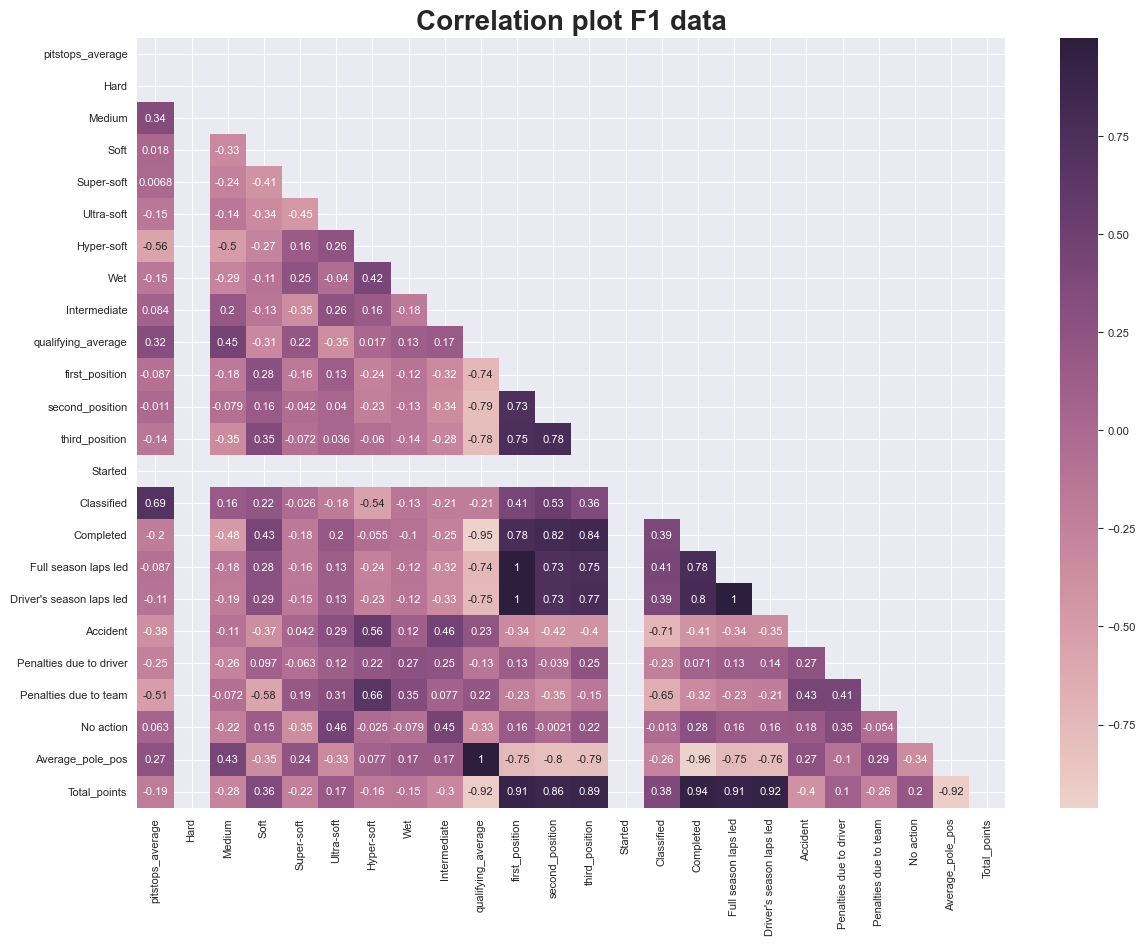

In [42]:
import numpy as np
sb.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (14, 10)
Mask = np.triu(np.ones_like(data))
sb.heatmap(data, cmap=sb.cubehelix_palette(as_cmap=True) , annot=True, mask=Mask)
plt.title('Correlation plot F1 data', weight='bold', fontsize=20)
plt.rc('font', size=8)

plt.show()


In [37]:
# Principal Components Analysis
from pca import pca
X = combined_data_C.iloc[:, 1:] # feature space
labels = combined_data_C['Driver']
model = pca(n_components=0.8, normalize=True)
results = model.fit_transform(X)
#results
results['loadings']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [24] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [24] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,pitstops_average,Hard,Medium,Soft,Super-soft,Ultra-soft,Hyper-soft,Wet,Intermediate,qualifying_average,...,Classified,Completed,Full season laps led,Driver's season laps led,Accident,Penalties due to driver,Penalties due to team,No action,Average_pole_pos,Total_points
PC1,-0.024393,1.110223e-16,-0.101509,0.148850,-0.072697,0.044568,-0.088625,-0.060283,-0.109552,-0.304445,...,0.166810,0.321174,0.306831,0.308824,-0.162758,0.025981,-0.132011,0.078048,-0.310742,0.332038
PC2,-0.377915,-1.040834e-16,-0.271758,-0.104570,-0.012814,0.264027,0.396625,0.165653,0.106942,-0.155924,...,-0.347593,0.080656,0.020317,0.029678,0.318305,0.272742,0.354636,0.160083,-0.123755,0.059026
PC3,-0.158852,4.163336e-17,-0.182174,-0.078789,0.482069,-0.326273,0.158387,0.292883,-0.477621,0.044464,...,-0.010729,0.008819,0.031897,0.039180,-0.127805,-0.072550,0.144733,-0.436589,0.067165,0.018532
PC4,0.001106,-1.665335e-16,-0.446793,0.635882,-0.045500,-0.317841,0.055607,0.166882,0.037581,-0.001426,...,-0.017906,0.083982,-0.151999,-0.144662,-0.059597,0.194556,-0.275875,0.171933,-0.013862,-0.069463
PC5,0.422264,-8.326673e-17,-0.008096,-0.185434,0.205046,0.016318,-0.046902,0.429307,0.114883,0.128940,...,0.327079,-0.067768,0.105992,0.097631,-0.063292,0.497373,0.152107,0.289196,0.132192,-0.038133


In [38]:
Scores = results['PC']
Scores['labels'] = labels
Scores

,PC1,PC2,PC3,PC4,PC5,labels
0,-3.164644,1.074846,0.931617,-2.999084,0.713569,Brendon Hartley
1,-0.899824,-0.255505,-2.450366,-0.136949,0.992587,Carlos Sainz Jnr
2,-2.066002,0.231678,-0.196201,-0.738791,-0.516338,Charles Leclerc
3,0.751041,2.260876,1.449274,-0.557112,-1.432880,Daniel Ricciardo
4,-0.959031,1.575478,0.426901,1.766557,-1.046272,Esteban Ocon
5,-1.669344,-0.350652,-1.878890,1.337678,-0.496603,Fernando Alonso
6,-0.525314,-0.697320,-1.617176,0.363463,0.358129,Kevin Magnussen
7,3.444282,0.765012,-1.448615,0.789472,-1.078250,Kimi Raikkonen
8,-2.271560,-2.106722,-1.891375,-0.288069,1.519740,Lance Stroll
9,7.102401,-0.813875,0.573805,-1.396947,0.101293,Lewis Hamilton


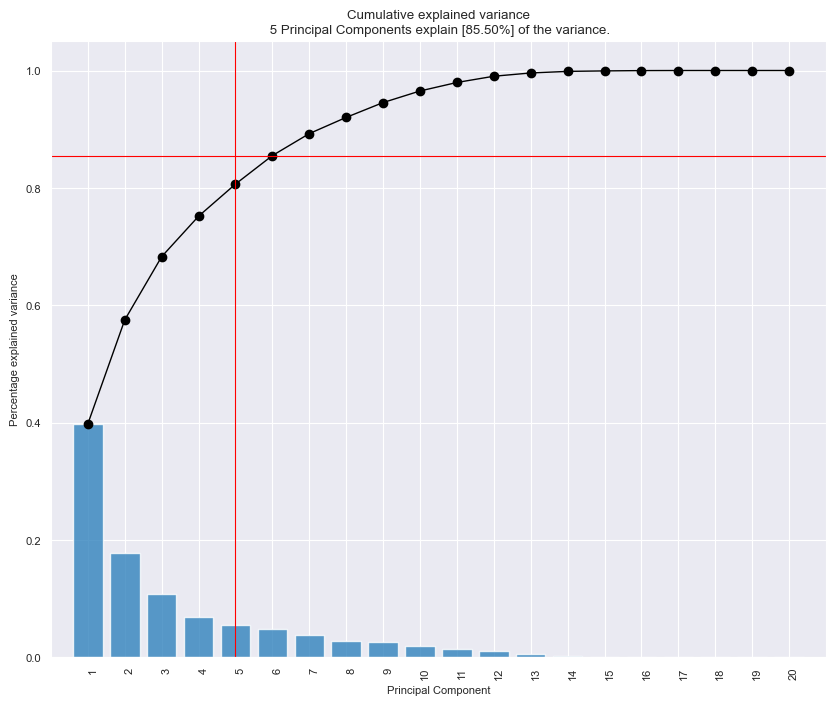

In [43]:
#Scree plot
model.plot(figsize=(10,8))
plt.savefig("C:/Users/user/Desktop/projectt/cumulativeexplainedvariance.png")
plt.show()

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca]> [WARNING]: De parameter <y> is deprecated and will not be supported in future version. Use <labels> instead.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


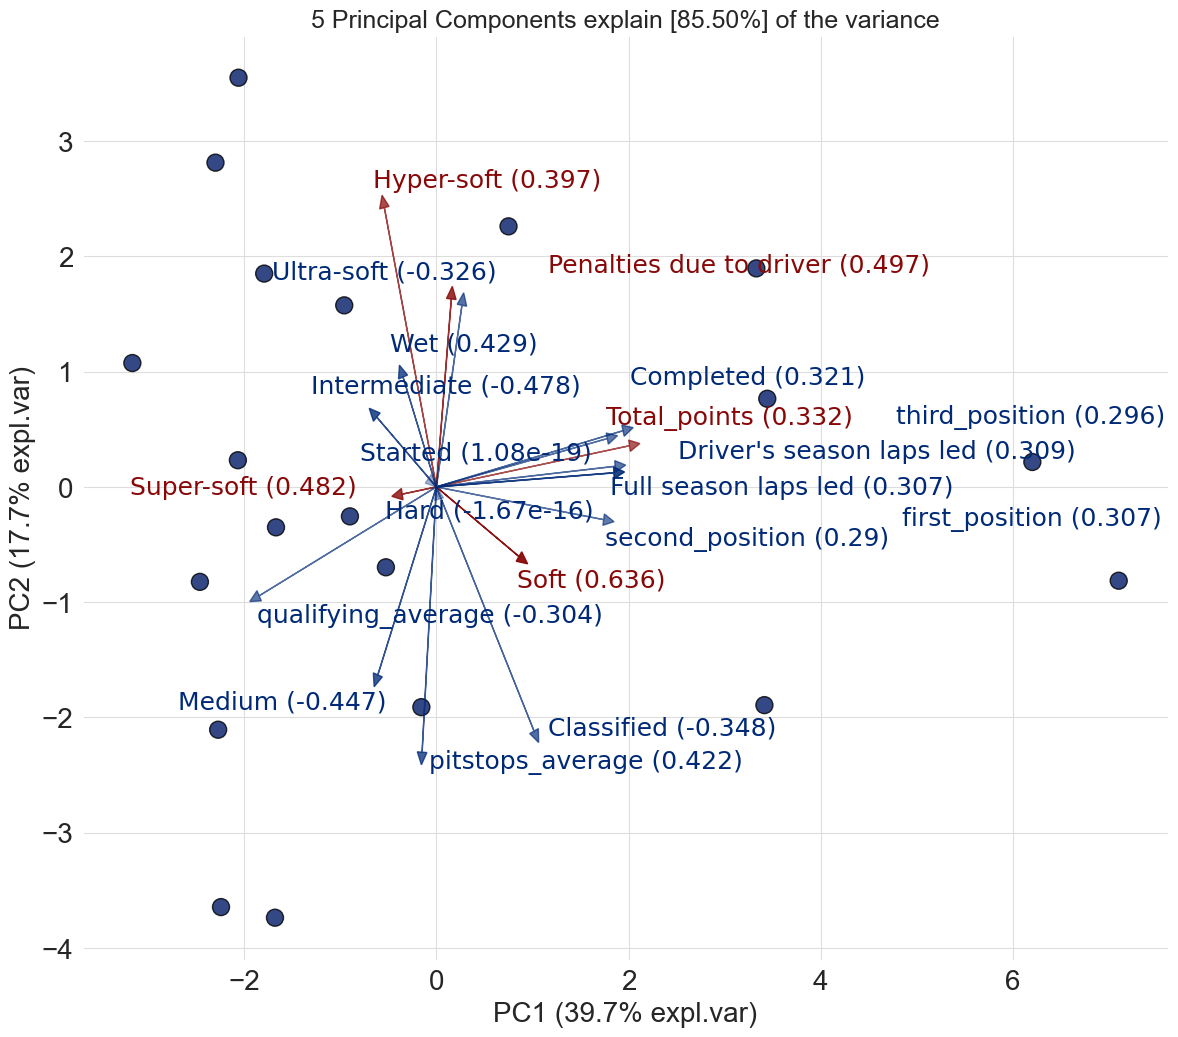

In [44]:
# Biplot
model.biplot(n_feat=20, legend=False, figsize=(14, 12), label=True, y=labels)
plt.rc('font', size=8)
plt.savefig("C:/Users/user/Desktop/projectt/biplot.png")
plt.show()